Chargement et exploration  des données




- **But** : convertir un fichier Excel à CSV  fichier Excel contenant les données des transactions et comprendre la structure du jeu de données.

- **Détails** : Utiliser `pandas` pour importer les données, vérifier les types de données, et gérer correctement les champs de date et d'heure (`Date_Règlement`, `Heure_Règlement`). Cette étape permet d'identifier les attributs clés et de s'assurer que les données sont prêtes pour l'analyse.




In [5]:
import pandas as pd

In [6]:
dt = pd.read_csv('REGLEMENTS.csv')

In [7]:
dt.head()

,ID_Règlement,ID_Operation,Date_Règlement,Heure_Règlement,Paiement,Référence,Montant_Rgl,Montant_Versé,Montant_Rst,ID_Client,...,Bénéficiaire_CPP,Solde_CPP,ID_Restaurant,Restaurant,ID_User,Prenom User,Role,Statut,Pointage,Date_Sys
0,287967,700877295,2024-02-29,08:07:37,Carte prépayée,NaN,13.5,13.5,0.0,CLT10001,...,MOUMOUN,952.00,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,False,2024-02-29
1,287983,700877305,2024-02-29,08:17:54,Carte prépayée,NaN,8.0,8.0,0.0,CLT10001,...,FARAIDI,921.51,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,False,2024-02-29
2,287994,700877312,2024-02-29,08:23:33,Carte prépayée,NaN,20.0,20.0,0.0,CLT10001,...,RACHIDI Salah,790.00,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,False,2024-02-29
3,282957,700874995,2024-02-22,11:19:17,Carte prépayée,NaN,87.0,87.0,0.0,CLT10001,...,EL AZRAK,346.23,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,False,2024-02-22
4,282972,700874999,2024-02-22,11:31:14,Carte prépayée,NaN,5.0,5.0,0.0,CLT10001,...,ZERIOUEL,875.50,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,False,2024-02-22


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# afficher le nombre de colonnes et de lignes dans le DataFrame dt
print('cloumns et lignes : ')
dt.shape

cloumns et lignes : 


(15222, 22)

In [11]:
# afficher les types des columns de DataFrame
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15222 entries, 0 to 15221
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_Règlement      15222 non-null  int64  
 1   ID_Operation      15222 non-null  int64  
 2   Date_Règlement    15222 non-null  object 
 3   Heure_Règlement   15222 non-null  object 
 4   Paiement          15222 non-null  object 
 5   Référence         99 non-null     float64
 6   Montant_Rgl       15222 non-null  float64
 7   Montant_Versé     15222 non-null  float64
 8   Montant_Rst       15222 non-null  float64
 9   ID_Client         10690 non-null  object 
 10  Client            10690 non-null  object 
 11  ID_CartePP        15222 non-null  object 
 12  Bénéficiaire_CPP  14668 non-null  object 
 13  Solde_CPP         15222 non-null  float64
 14  ID_Restaurant     15222 non-null  object 
 15  Restaurant        15222 non-null  object 
 16  ID_User           15221 non-null  object

In [12]:
# afficher le nombre de valeurs manquantes (NaN) dans chaque colonne du DataFrame
dt.isnull().sum()

,0
ID_Règlement,0
ID_Operation,0
Date_Règlement,0
Heure_Règlement,0
Paiement,0
Référence,15123
Montant_Rgl,0
Montant_Versé,0
Montant_Rst,0
ID_Client,4532


In [13]:
#  convertir la colonne Date_Règlement du DataFrame dt en datetime64
dt['Date_Règlement'] = pd.to_datetime(dt['Date_Règlement'], errors='coerce')


In [14]:
# Conversion de la colonne Heure_Règlement en datetime  puis extraction uniquement de l'heure

dt['Heure_Règlement'] = pd.to_datetime(dt['Heure_Règlement'],format='%H:%M:%S').dt.time



2- **Analyse des tendances des transactions :**

- **But** : Comprendre les fluctuations des transactions au fil du temps.
- **Détails** : Grouper les transactions par jour, semaine et mois pour identifier les tendances des montants de transactions (`Montant_Rgl`). Générer des graphiques linéaires pour visualiser les fluctuations sur ces périodes et repérer des pics ou des baisses d'activité.



In [15]:
## Convertir la colonne 'Montant_Rgl' en format numérique, en remplaçant les erreurs par NaN
dt['Montant_Rgl'] = pd.to_numeric(dt['Montant_Rgl'], errors='coerce')

# Regrouper les transactions par date de règlement et calculer le montant total pour chaque jour
transactions_day = dt.groupby(dt['Date_Règlement'])['Montant_Rgl'].sum().reset_index()
# Renommer les colonnes du DataFrame résultant pour plus de clarté
transactions_day.columns = ['Day', 'Total_Montant']

# Regrouper les transactions par semaine et calculer le montant total pour chaque semaine
transactions_week = dt.resample('W', on='Date_Règlement')['Montant_Rgl'].sum().reset_index()
# Renommer les colonnes du DataFrame résultant pour plus de clarté
transactions_week.columns = ['Week', 'Total_Montant']

# Regrouper les transactions par mois et calculer le montant total pour chaque mois
transactions_month = dt.resample('ME', on='Date_Règlement')['Montant_Rgl'].sum().reset_index()
# Renommer les colonnes du DataFrame résultant pour plus de clarté
transactions_month.columns = ['Month', 'Total_Montant']


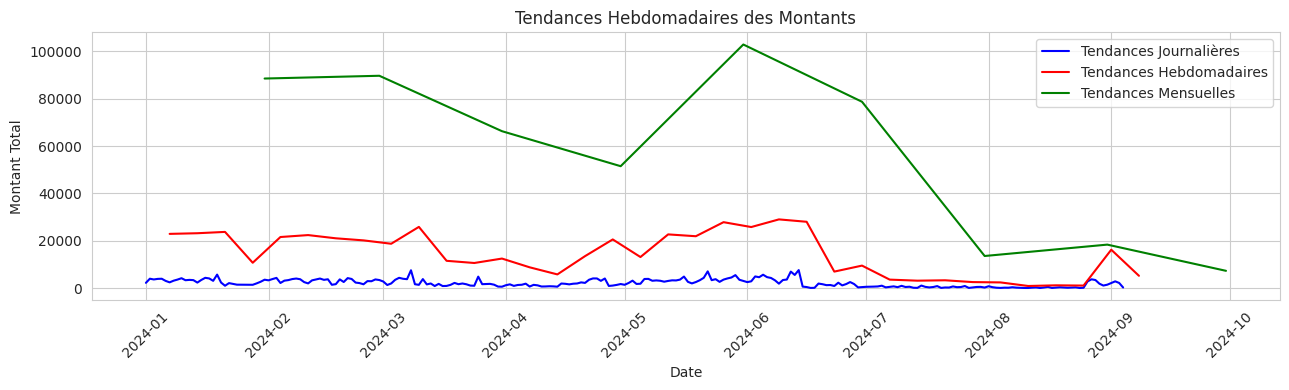

In [63]:
import matplotlib.pyplot as plt

# Initialiser la figure avec une taille de 13x4 pouces
plt.figure(figsize=(13,4))
#  Tracer les tendances journalières
plt.plot(transactions_day['Day'], transactions_day['Total_Montant'], label='Tendances Journalières', color='b')

# Tracer les tendances hebdomadaires
plt.plot(transactions_week['Week'], transactions_week['Total_Montant'], label='Tendances Hebdomadaires', color='r')

# Tracer les tendances mensuelles
plt.plot(transactions_month['Month'], transactions_month['Total_Montant'], label='Tendances Mensuelles', color='g')

#
# Ajouter un titre et des étiquettes aux axes
plt.title('Tendances Hebdomadaires des Montants')
plt.ylabel('Montant Total')
plt.xlabel('Date')

# Faire pivoter les étiquettes de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45)

# Ajouter une grille pour améliorer la lisibilité du graphique
plt.grid(True)

# Ajuster la mise en page pour éviter le chevauchement des éléments
plt.tight_layout()

# Ajouter une légende pour distinguer les différents tracés
plt.legend()

# Afficher le graphique
plt.show()


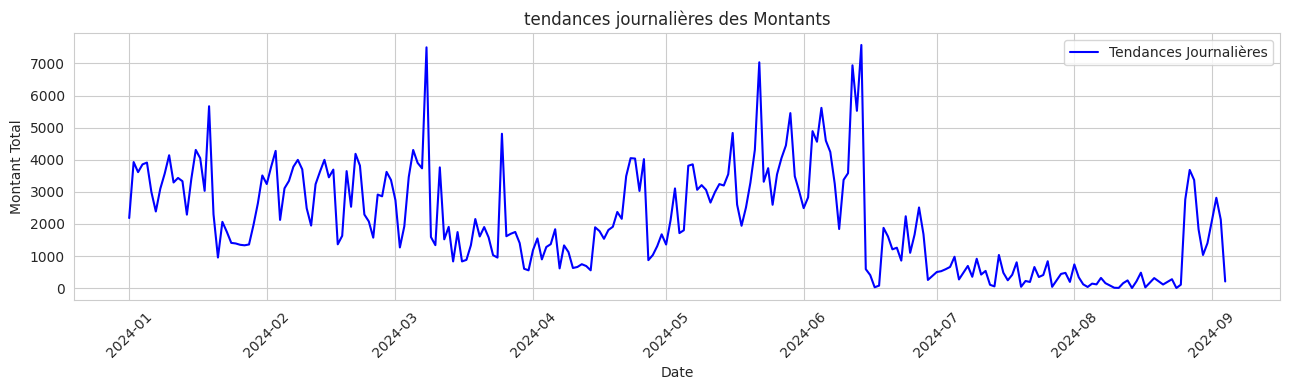

In [64]:
import matplotlib.pyplot as plt

# Initialiser la figure avec une taille de 13x4 pouces
plt.figure(figsize=(13,4))

# Tracer les tendances journalières
plt.plot(transactions_day['Day'], transactions_day['Total_Montant'], label='Tendances Journalières', color='b')

# Ajouter un titre et des étiquettes aux axes
plt.title('tendances journalières des Montants')
plt.ylabel('Montant Total')
plt.xlabel('Date')
# Faire pivoter les étiquettes de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45)

# Ajouter une grille pour améliorer la lisibilité du graphique
plt.grid(True)

# Ajuster la mise en page pour éviter le chevauchement des éléments
plt.tight_layout()

# Ajouter une légende pour distinguer les différents tracés
plt.legend()

# Afficher le graphique
plt.show()


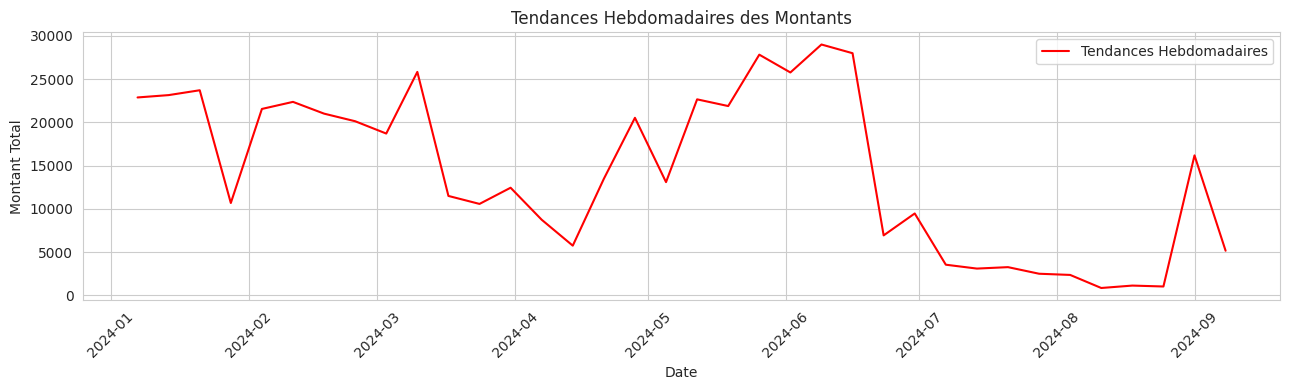

In [61]:
import matplotlib.pyplot as plt

# Initialiser la figure avec une taille de 13x4 pouces
plt.figure(figsize=(13,4))


plt.plot(transactions_week['Week'], transactions_week['Total_Montant'], label='Tendances Hebdomadaires', color='r')

# Ajouter un titre et des étiquettes aux axes
plt.title('Tendances Hebdomadaires des Montants')
plt.ylabel('Montant Total')
plt.xlabel('Date')

# Faire pivoter les étiquettes de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45)

# Ajouter une grille pour améliorer la lisibilité du graphique
plt.grid(True)

# Ajuster la mise en page pour éviter le chevauchement des éléments
plt.tight_layout()

# Ajouter une légende pour distinguer les différents tracés
plt.legend()

# Afficher le graphique
plt.show()


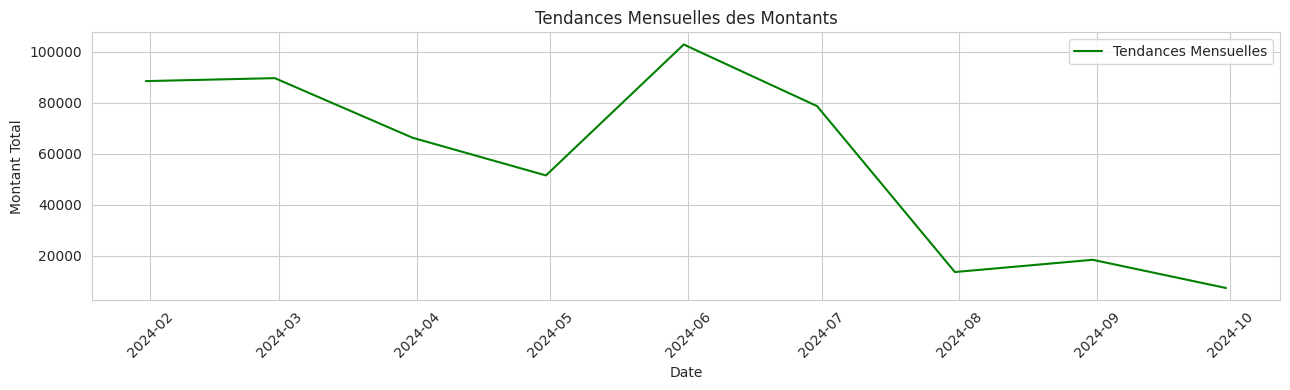

In [59]:
import matplotlib.pyplot as plt

# Initialiser la figure avec une taille de 13x4 pouces
plt.figure(figsize=(13,4))

# Tracer les Tendances Mensuelles
plt.plot(transactions_month['Month'], transactions_month['Total_Montant'], label='Tendances Mensuelles', color='g')

# Ajouter un titre et des étiquettes aux axes
plt.title('Tendances Mensuelles des Montants')
plt.ylabel('Montant Total')
plt.xlabel('Date')

# Faire pivoter les étiquettes de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45)

# Ajouter une grille pour améliorer la lisibilité du graphique
plt.grid(True)

# Ajuster la mise en page pour éviter le chevauchement des éléments
plt.tight_layout()

# Ajouter une légende pour distinguer les différents tracés
plt.legend()

# Afficher le graphique
plt.show()



## 3. Analyse des tendances d'utilisation des cartes prépayées

- **But** : Suivre l'évolution des soldes des cartes prépayées.
- **Détails** : Grouper les données par date et calculer la moyenne des soldes (`Solde_CPP`) pour observer les tendances sur une base journalière. Visualiser ces tendances avec des graphiques linéaires, ce qui aide à comprendre l’utilisation des cartes au fil du temps.


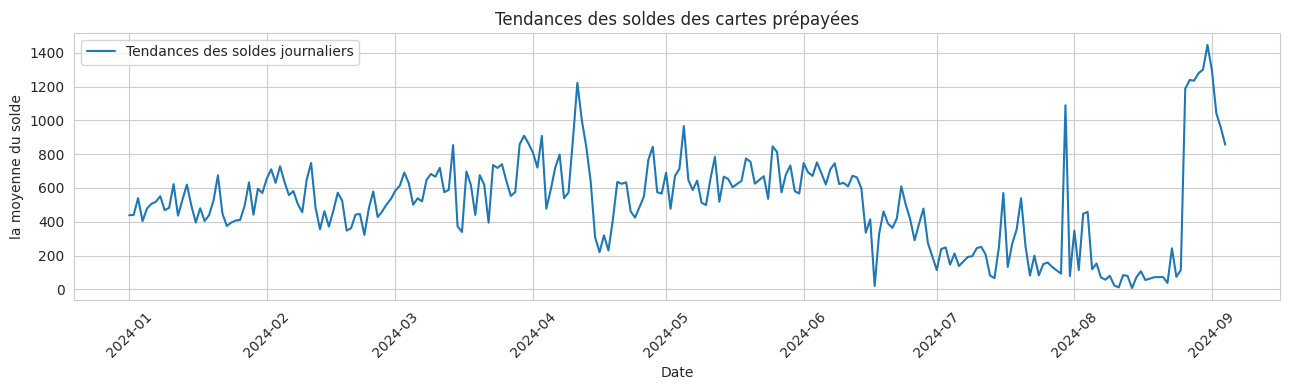

In [70]:
# Analyser les tendances des soldes des cartes prépayées au fil du temps en groupant les données par date et en calculant la moyenne du solde (Solde_CPP).
# Créer un graphique linéaire pour visualiser les tendances des soldes journaliers des cartes prépayées.

# Convertir la colonne 'Solde_CPP' en format numérique, en remplaçant les erreurs par NaN
dt['Solde_CPP'] = pd.to_numeric(dt['Solde_CPP'], errors='coerce')

# Regrouper les données par date de règlement et calculer la moyenne du solde pour chaque jour
balance_trends_daily = dt.groupby('Date_Règlement')['Solde_CPP'].mean().reset_index()

# Renommer les colonnes pour plus de clarté
balance_trends_daily.columns = ['Date', 'Solde_Moyen']

# Créer le graphique linéaire
plt.figure(figsize=(13, 4))  # Ajuster la taille du graphique
plt.plot(balance_trends_daily['Date'], balance_trends_daily['Solde_Moyen'], label='Tendances des soldes journaliers')

plt.title("Tendances des soldes des cartes prépayées")
plt.xlabel("Date")
plt.ylabel("la moyenne du solde")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()



## 4. Analyse du comportement des clients

- **But** : Identifier les clients les plus actifs et analyser leurs habitudes.
*texte en italique*- **Détails** : Grouper les transactions par client (`Nom User`) pour calculer le montant total dépensé et la dépense moyenne par transaction. Analyser les tendances du solde des cartes pour les plus gros dépensiers. Visualiser les résultats avec des graphiques en barres pour :
  - Les 10 clients les plus dépensiers.
  - Les clients avec la dépense moyenne par transaction la plus élevée.
  - Les clients avec le solde moyen de carte prépayée le plus élevé.


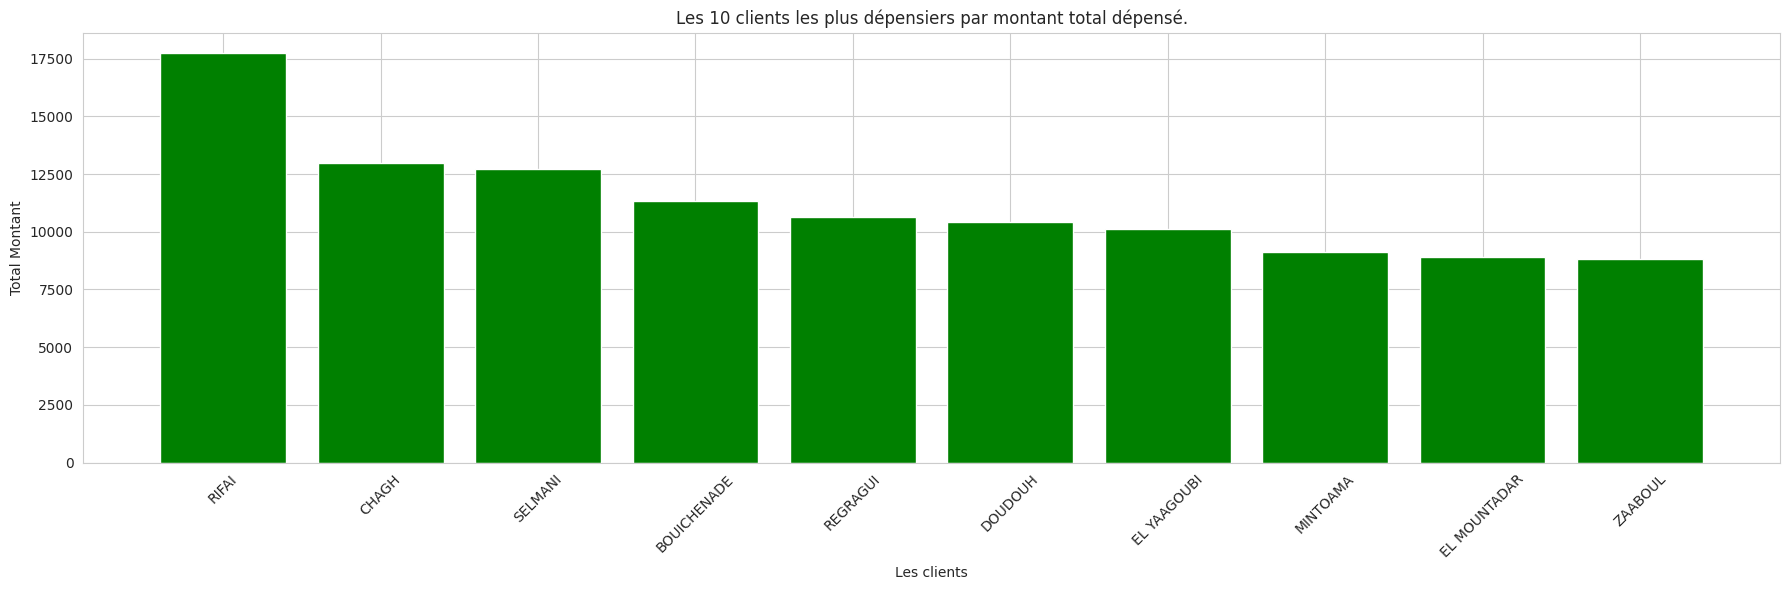

In [72]:
import matplotlib.pyplot as plt

Tmontant_grouped=dt.groupby('Bénéficiaire_CPP')['Montant_Rgl'].sum().reset_index().sort_values(by='Montant_Rgl',ascending=False).head(10)
Tmontant_grouped.columns=['Bénéficiairies','Total_Montant']

grouped_moyenne=dt.groupby('Bénéficiaire_CPP')['Montant_Rgl'].mean().reset_index().sort_values(by='Montant_Rgl',ascending=False).head(10)
grouped_moyenne.columns=['Bénéficiairies','moyenne_Montant']
# Initialiser la figure avec une taille de 18x6 pouces
plt.figure(figsize=(18, 6))

# Tracer un graphique à barres pour le montant total dépensé par chaque client
plt.bar(Tmontant_grouped['Bénéficiairies'], Tmontant_grouped['Total_Montant'], color='g')
plt.xlabel("Les clients")
plt.ylabel("Total Montant")
# Ajouter une grille pour améliorer la lisibilité du graphique
plt.grid(True)

# Ajouter un titre au graphique
plt.title('Les 10 clients les plus dépensiers par montant total dépensé.')

# Faire pivoter les étiquettes de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45)

# Ajuster la mise en page pour éviter le chevauchement des éléments
plt.tight_layout()

# Afficher le graphique
plt.show()


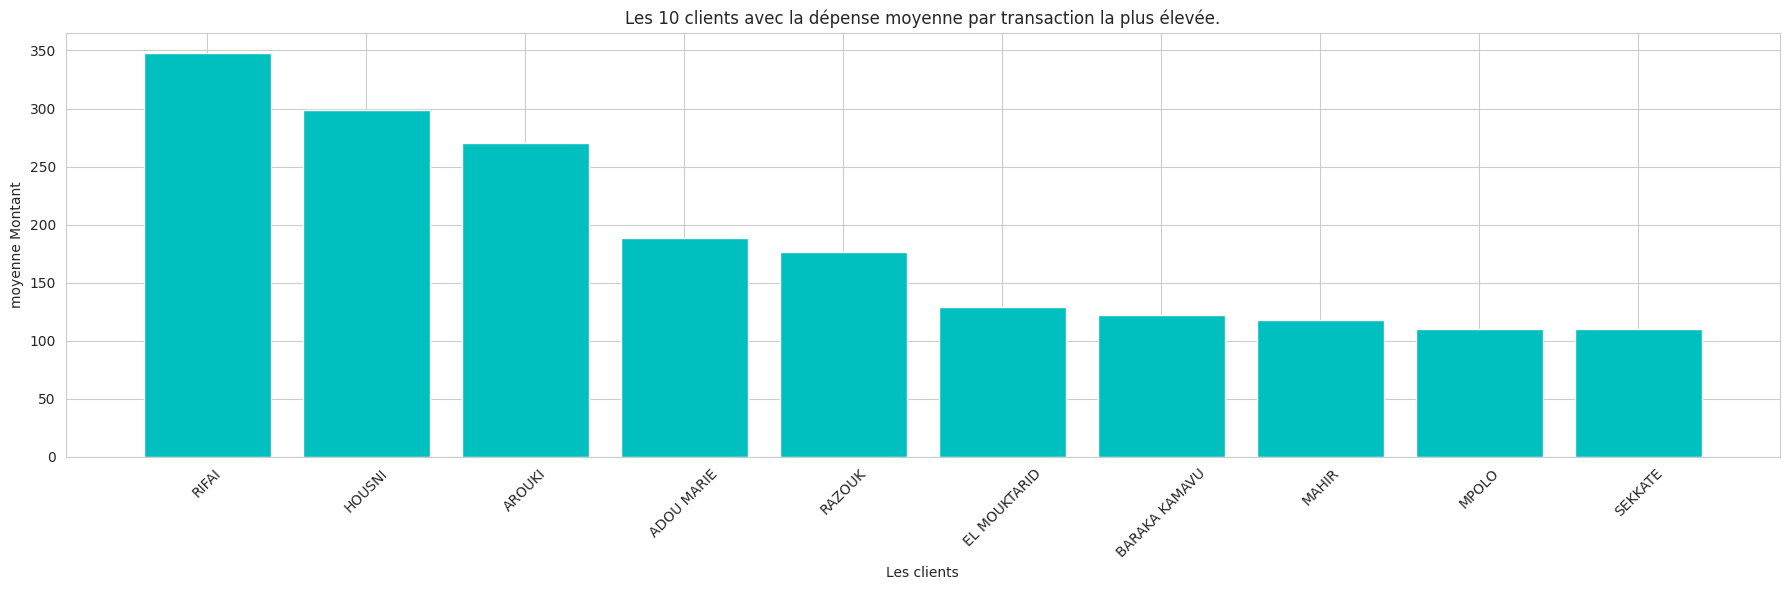

In [73]:
import matplotlib.pyplot as plt

# Initialiser la figure avec une taille de 18x6 pouces
plt.figure(figsize=(18, 6))

# Tracer un graphique à barres pour la dépense moyenne par transaction de chaque client
plt.bar(grouped_moyenne['Bénéficiairies'], grouped_moyenne['moyenne_Montant'], color='c')

# Ajouter une grille pour améliorer la lisibilité du graphique
plt.grid(True)
plt.xlabel("Les clients")
plt.ylabel("moyenne Montant")
# Ajouter un titre au graphique
plt.title('Les 10 clients avec la dépense moyenne par transaction la plus élevée.')

# Faire pivoter les étiquettes de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45)

# Ajuster la mise en page pour éviter le chevauchement des éléments
plt.tight_layout()

# Afficher le graphique
plt.show()


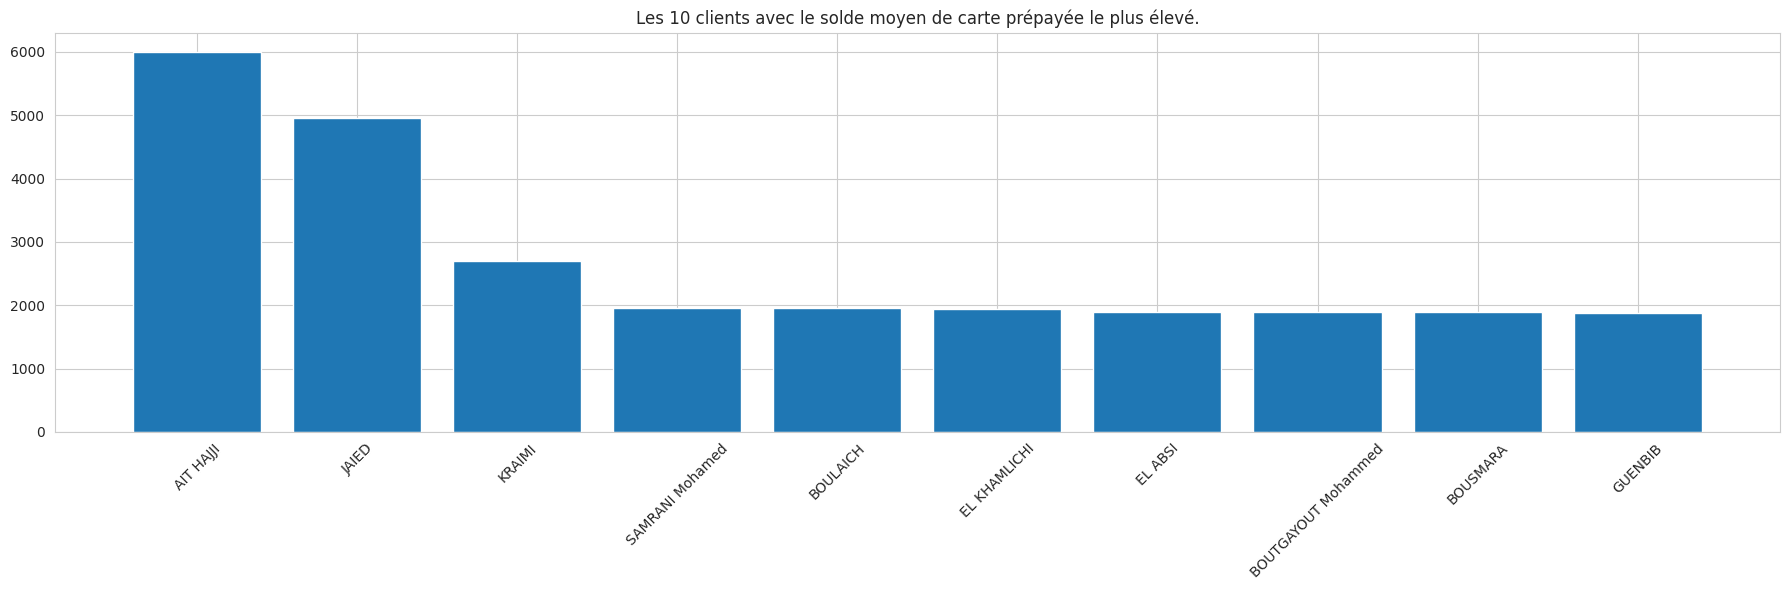

In [74]:
plt.figure(figsize=(18, 6))

grouped_sold=dt.groupby('Bénéficiaire_CPP')['Solde_CPP'].mean().reset_index().sort_values(by='Solde_CPP',ascending=False).head(10)
grouped_sold.columns=['Bénéficiaire_CPP','moyenne_sold']
# Tracer un graphique à barres pour le solde total de chaque bénéficiaire
plt.bar(grouped_sold['Bénéficiaire_CPP'], grouped_sold['moyenne_sold'])

# Ajouter une grille pour améliorer la lisibilité du graphique
plt.grid(True)

# Ajouter un titre au graphique
plt.title('Les 10 clients avec le solde moyen de carte prépayée le plus élevé.')

# Faire pivoter les étiquettes de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45)

# Ajuster la mise en page pour éviter le chevauchement des éléments
plt.tight_layout()

# Afficher le graphique
plt.show()




## 5. Analyse des montants restants et des soldes à zéro

- **But** : Identifier les clients ayant des montants restants à payer ou des cartes à solde zéro.
- **Détails** : Filtrer les transactions pour trouver celles avec des montants restants impayés (`Montant_Rst > 0`) et celles avec des soldes de carte égaux à zéro (`Solde_CPP == 0`). Grouper ces données par client et créer des graphiques en barres pour mettre en évidence les clients ayant les plus gros montants impayés.


In [75]:
# Filtrer les transactions avec des montants restants impayés (Montant_Rst > 0)
dt_new = dt[dt['Montant_Rst'] > 0]
# Regrouper les données par bénéficiaire et calculer la somme des montants Rst
soldes_impaye = dt_new.groupby('Bénéficiaire_CPP')['Montant_Rst'].sum().reset_index()
soldes_impaye.columns = ['Bénéficiaire_CPP', 'Montant_Rst']
soldes_impaye = soldes_impaye.sort_values(by='Montant_Rst', ascending=False).head(10)
soldes_impaye

,Bénéficiaire_CPP,Montant_Rst
24,RIFAI,7.629394e-05
27,SELMANI,4.482269e-05
23,REGRAGUI,2.288818e-05
16,HOUSNI,2.145767e-06
26,SEGBEDJI Yao,1.907349e-06
13,EL YAAGOUBI,1.907349e-06
5,CHAGH,1.907349e-06
8,DOUDOUH,1.907349e-06
18,KADIRI Lalla,9.536743e-07
1,AMEZIANE,9.536743e-07


In [76]:
# Filtrer les transactions avec un solde de carte prépayée égal à zéro
group_solde_egaux=dt[dt['Solde_CPP']==0]

# Analyser les clients avec un solde de carte prépayée égal à zéro

montant_total_clients_solde_zero = group_solde_egaux['Montant_Rgl'].sum()
print(f"Montant total des transactions effectuées par les clients avec un solde de carte prépayée égal à zéro : {montant_total_clients_solde_zero}")

print("Clients avec un solde de carte prépayée égal à zéro :")

montant_total_clients_solde_zero
# les clients avec Solde_CPP=0 ne existent pas


Montant total des transactions effectuées par les clients avec un solde de carte prépayée égal à zéro : 0.0
Clients avec un solde de carte prépayée égal à zéro :


0.0

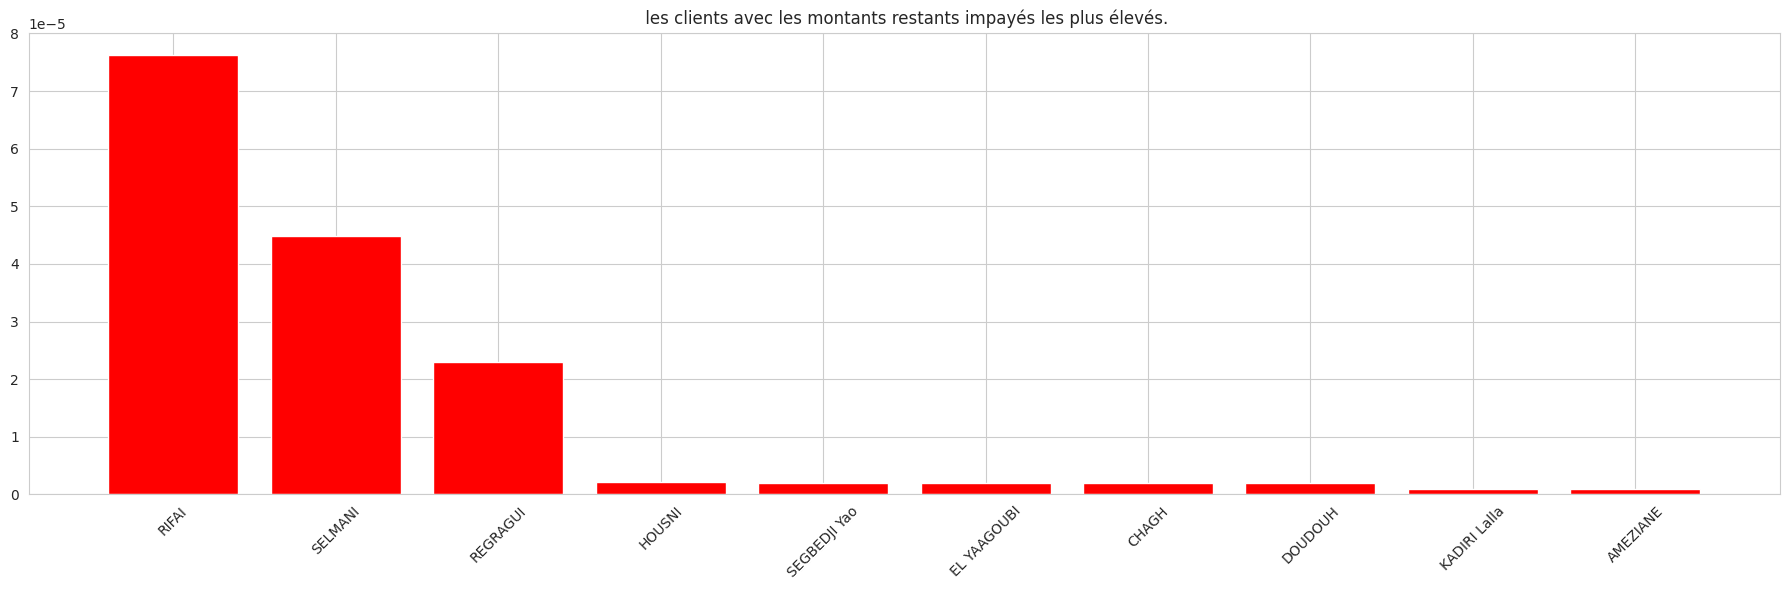

In [77]:
plt.figure(figsize=(18, 6))


# Tracer un graphique à barres pour le solde total de chaque bénéficiaire
plt.bar(soldes_impaye['Bénéficiaire_CPP'], soldes_impaye['Montant_Rst'],color='r')

# Ajouter une grille pour améliorer la lisibilité du graphique
plt.grid(True)

# Ajouter un titre au graphique
plt.title(' les clients avec les montants restants impayés les plus élevés.')

# Faire pivoter les étiquettes de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45)

# Ajuster la mise en page pour éviter le chevauchement des éléments
plt.tight_layout()

# Afficher le graphique
plt.show()




## 6. Analyse des heures de pointe et des lieux les plus performants

- **But** : Identifier les moments et les lieux les plus performants pour les transactions.
- **Détails** : Grouper les transactions par restaurant et par heure pour analyser les performances. Identifier les restaurants ayant le chiffre d'affaires le plus élevé (`Montant_Rgl`) et les heures où les transactions sont les plus fréquentes. Créer des graphiques en barres pour visualiser ces résultats.


In [82]:
# Analyser les lieux les plus performants en groupant les transactions par restaurant (Restaurant)
# et en calculant les revenus totaux (Montant_Rgl).

grouped_restaurant=dt.groupby('Restaurant')['Montant_Rgl'].sum().reset_index()
grouped_restaurant.columns=['Restaurant','Total_Montant']
grouped_restaurant=grouped_restaurant.sort_values(by='Total_Montant',ascending=False)
grouped_restaurant



,Restaurant,Total_Montant
6,Snack Pizzeria - Rabat,207864.000000
0,Café - Boulangerie - Pâtisserie - Rabat,183514.500000
3,Lavomatic - Rabat,46274.139999
4,Pharmacie & Parapharmacie - Rabat,33323.810572
2,L'Casis Cafétéria HCZ,21571.500000
5,Restaurant Gastronomique - Rabat,16405.000000
1,Epicerie - Rabat,7903.250010


In [91]:
test_hours = dt['Heure_Règlement'].isnull().any()
# Convertir 'Heure_Règlement' en format datetime et extraire l'heure au format 'Formatted_Hour'
dt['Heure_Règlement'] = pd.to_datetime(dt['Heure_Règlement'], format='%H:%M:%S', errors='coerce')
dt['Formatted_Hour'] = dt['Heure_Règlement'].apply(lambda x:x.hour)
# Identifier les heures de pointe en groupant les données par Heure_Règlement (heure).
group_hour_clients = dt.groupby('Formatted_Hour')['Bénéficiaire_CPP'].count().reset_index().sort_values(by='Bénéficiaire_CPP', ascending=False)
group_hour_clients.columns = ['heures_pointe', 'Nombre_de_clients']
group_hour_clients


,heures_pointe,Nombre_de_clients
8,12,1977
6,10,1374
13,17,1157
15,19,1108
5,9,1070
11,15,946
12,16,920
9,13,901
7,11,774
10,14,732


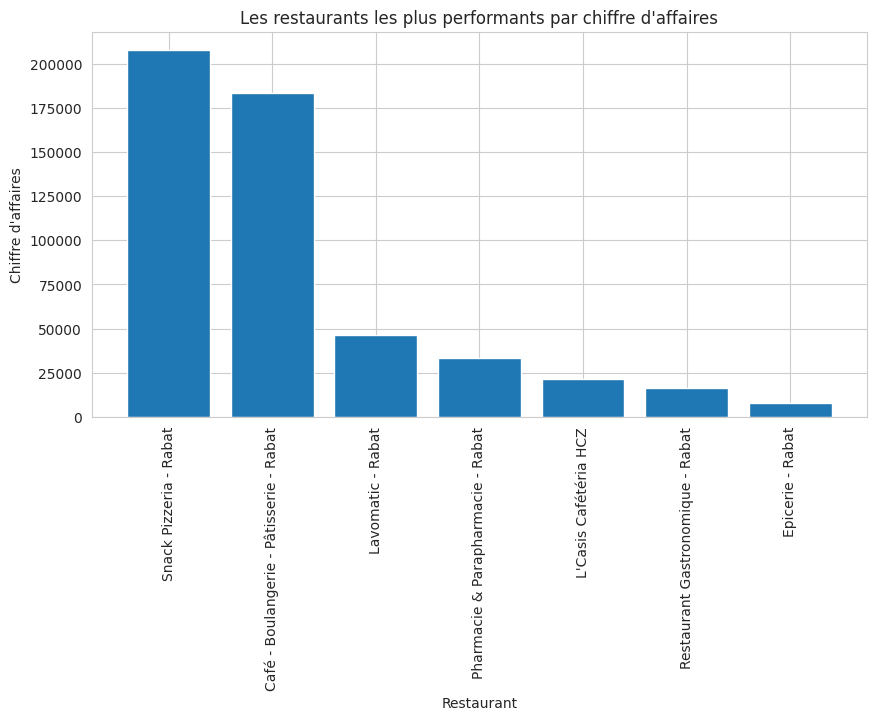

In [93]:
# graphique en barres pour visualiser les restaurants les plus performants par chiffre d'affaires *
# et les heures de pointe des transactions.
'''=> plt.bar in Matplotlib does not directly support datetime.time'''
plt.figure(figsize=(10, 5))
plt.bar(grouped_restaurant['Restaurant'],grouped_restaurant['Total_Montant'])
plt.grid(True)
plt.title('Les restaurants les plus performants par chiffre d\'affaires')
plt.xlabel('Restaurant')
plt.ylabel('Chiffre d\'affaires')
plt.xticks(rotation=90)
plt.show()



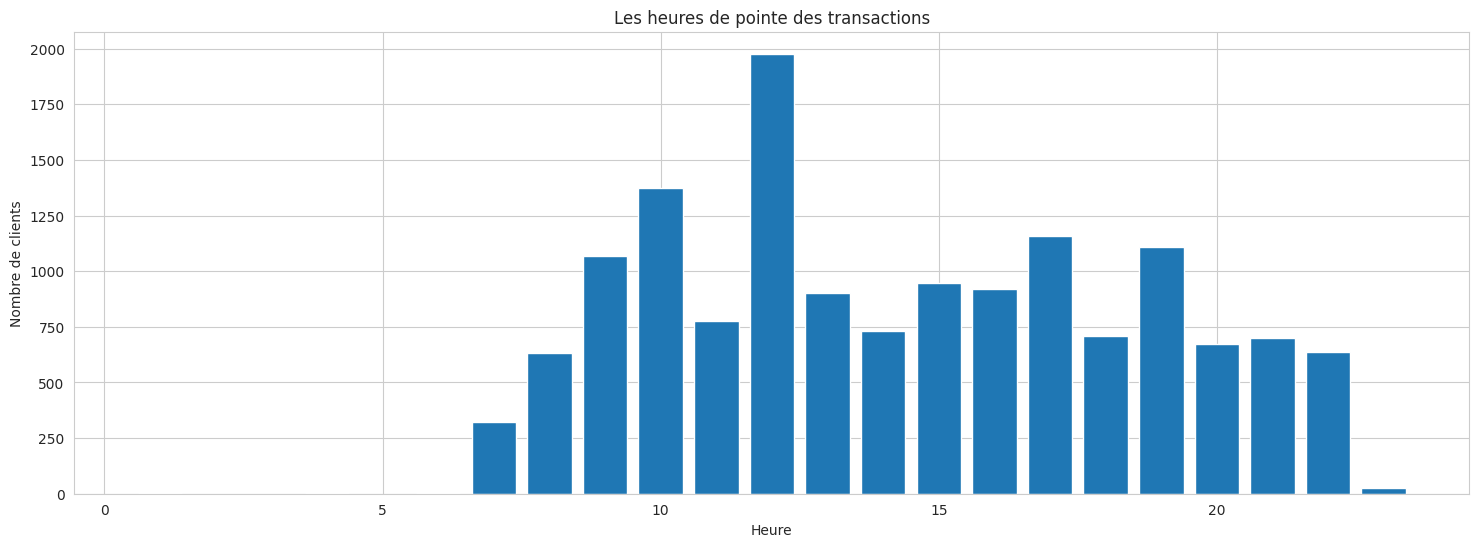

In [92]:
#  graphique en barres pour visualiser les heures de pointe des transactions.
# group_hour_clients.columns = ['heures_pointe', 'Nombre_de_clients']

plt.figure(figsize=(18, 6))
plt.bar(group_hour_clients['heures_pointe'],group_hour_clients['Nombre_de_clients'])
plt.grid(True)
plt.title('Les heures de pointe des transactions')
plt.xlabel('Heure')
plt.ylabel('Nombre de clients')
plt.show()

## 7. Détection des anomalies (outliers)

- **But** : Repérer les transactions atypiques.
- **Détails** : Utiliser la méthode de l'écart interquartile (IQR) pour détecter les anomalies dans les montants des transactions. Grouper ces anomalies par client, restaurant et heure de la journée pour identifier les motifs récurrents. Visualiser ces anomalies à l'aide de scatter plots et de graphiques en barres.


In [94]:
# Calculer les quartiles
Q1 = dt['Montant_Rgl'].quantile(0.25)  # 1er quartile (25%)
Q3 = dt['Montant_Rgl'].quantile(0.75)  # 2e quartile (75%)

# Calculer l'IQR (Interquartile Range) + utliser IQR pour obtenir la Moyenne quartile
IQR = Q3 - Q1

# Calculer les bornes inférieure et supérieure
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Afficher les bornes
print(lower_bound, upper_bound)

# Détecter les anomalies dans les montants des transactions
outliers = dt[(dt['Montant_Rgl'] < lower_bound) | (dt['Montant_Rgl'] > upper_bound)]

# Afficher les valeurs aberrantes
print("Outliers:")
print(outliers['Montant_Rgl'])


-42.5 97.5
Outliers:
71        99.500000
131      100.000000
169      110.000000
170      971.572010
181      200.000000
            ...    
14682    297.600006
14763    105.000000
14789    128.000000
14856    186.300003
15008    100.000000
Name: Montant_Rgl, Length: 564, dtype: float64


In [102]:
# Regrouper les anomalies par client et sommer les montants
outliers_ParClient = outliers.groupby(['Bénéficiaire_CPP'])['Montant_Rgl'].sum().reset_index().sort_values(by='Montant_Rgl', ascending=False)
outliers_ParClient.columns = ['Bénéficiaires', 'Montant_Rgl']
# print(outliers_ParClient)

# Regrouper les anomalies par restaurant et sommer les montants
outliers_ParRestaurant = outliers.groupby(['Restaurant'])['Montant_Rgl'].sum().reset_index().sort_values(by='Montant_Rgl', ascending=False)
outliers_ParRestaurant.columns = ['Restaurants', 'Montant_Rgl']
# print(outliers_ParRestaurant)

# Convertir la colonne 'Heure_Règlement' en format datetime et extraire l'heure
outliers['Heure_Règlement'] = pd.to_datetime(outliers['Heure_Règlement'], format='%H:%M:%S').dt.time
# print(outliers.info())

# Regrouper les anomalies par heure de règlement et sommer les montants
outliers_ParHeure = outliers.groupby(['Heure_Règlement'])['Montant_Rgl'].sum().reset_index().sort_values(by='Montant_Rgl', ascending=False)
outliers_ParHeure.columns = ['Heure_Règlement', 'Montant_Rgl']




<ipython-input-102-e794a794ffdc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['Heure_Règlement'] = pd.to_datetime(outliers['Heure_Règlement'], format='%H:%M:%S').dt.time


<ipython-input-105-488c82fdb561>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Restaurants', y='Montant_Rgl', data=outliers_ParRestaurant.head(10), ax=axes[0], palette='Reds_d')
<ipython-input-105-488c82fdb561>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Heure_Règlement', y='Montant_Rgl', data=outliers_ParHeure.head(10), ax=axes[1], palette='Greens_d')
<ipython-input-105-488c82fdb561>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Bénéficiaires', y='Montant_Rgl', data=outliers_ParClient.head(10), ax=axes[2], palette='Bl

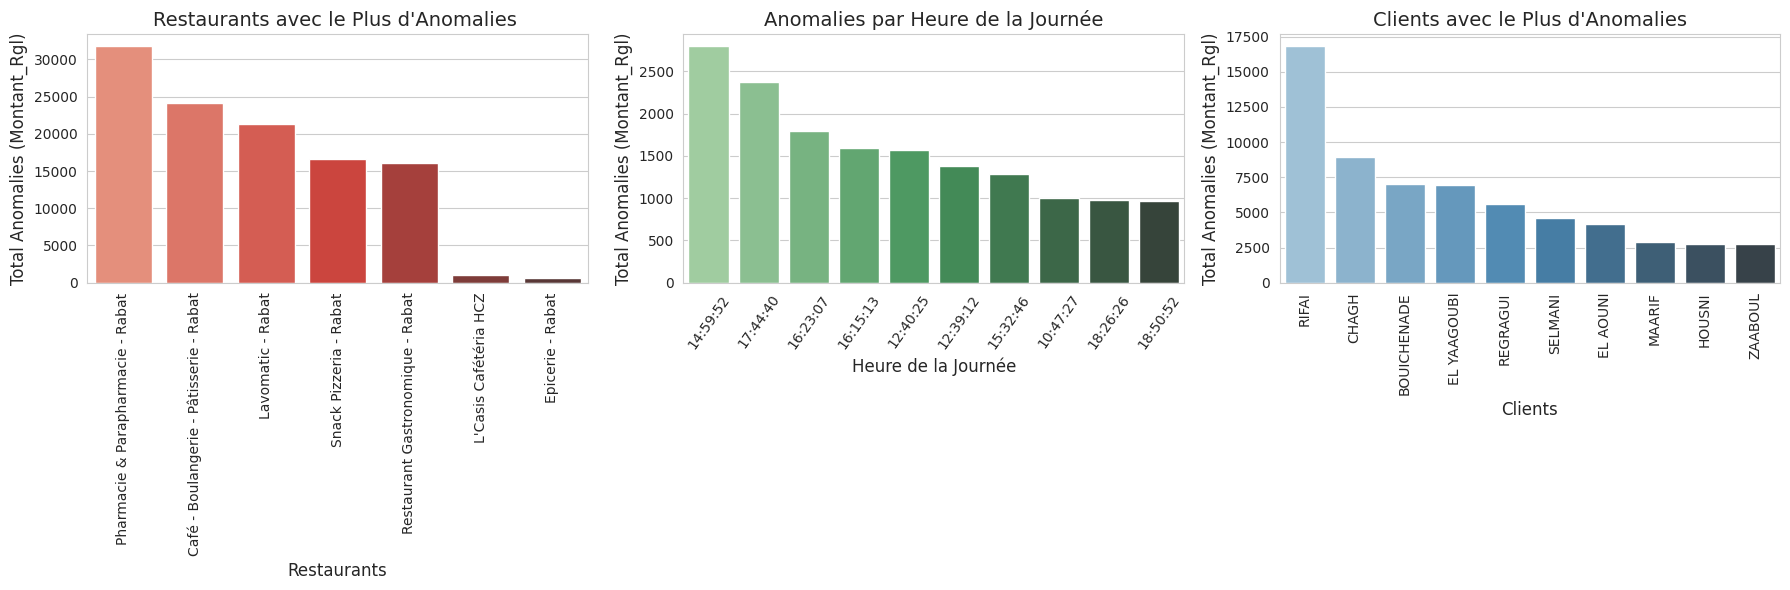

In [105]:
import seaborn as sns

# Appliquer un style moderne avec des grilles et des palettes de couleurs dégradées
sns.set_style("whitegrid")  # Fond épuré avec des lignes de grille pour plus de lisibilité

# Créer une grille avec 1 ligne et 3 colonnes pour afficher trois visualisations côte à côte
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Dimension du graphique : 18 (largeur) et 6 (hauteur)

# Visualisation 1 : Graphique en barres pour les restaurants
# On affiche les 10 restaurants avec les montants d'anomalies les plus élevés
sns.barplot(x='Restaurants', y='Montant_Rgl', data=outliers_ParRestaurant.head(10), ax=axes[0], palette='Reds_d')
axes[0].set_title("Restaurants avec le Plus d'Anomalies ", fontsize=14)  # Ajouter un titre significatif avec une taille de police de 14
axes[0].set_xlabel("Restaurants", fontsize=12)  # Ajouter un libellé pour l'axe des abscisses avec une taille de police de 12
axes[0].set_ylabel("Total Anomalies (Montant_Rgl)", fontsize=12)  # Libellé de l'axe des ordonnées
axes[0].tick_params(axis='x', rotation=90)  # Rotation des étiquettes de l'axe X à 90° pour améliorer la lisibilité

# Visualisation 2 : Graphique en barres pour les heures de règlement
# On montre les 10 plages horaires où les anomalies de règlement sont les plus fréquentes
sns.barplot(x='Heure_Règlement', y='Montant_Rgl', data=outliers_ParHeure.head(10), ax=axes[1], palette='Greens_d')
axes[1].set_title("Anomalies par Heure de la Journée", fontsize=14)  # Titre avec taille de police de 14 pour souligner l'importance de l'heure
axes[1].set_xlabel("Heure de la Journée", fontsize=12)  # Libellé de l'axe X
axes[1].set_ylabel("Total Anomalies (Montant_Rgl)", fontsize=12)  # Libellé de l'axe Y
axes[1].tick_params(axis='x', rotation=55)  # Rotation des étiquettes à 55° pour un meilleur affichage des heures

# Visualisation 3 : Graphique en barres pour les clients
# Cette visualisation met en avant les 10 clients avec les montants d'anomalies les plus élevés
sns.barplot(x='Bénéficiaires', y='Montant_Rgl', data=outliers_ParClient.head(10), ax=axes[2], palette='Blues_d')
axes[2].set_title("Clients avec le Plus d'Anomalies", fontsize=14)  # Titre pour identifier les clients principaux avec des anomalies
axes[2].set_xlabel("Clients", fontsize=12)  # Libellé de l'axe X pour les clients
axes[2].set_ylabel("Total Anomalies (Montant_Rgl)", fontsize=12)  # Libellé de l'axe Y
axes[2].tick_params(axis='x', rotation=90)  # Rotation à 90° pour les noms de clients souvent longs

# Ajuster la disposition des sous-graphiques pour éviter les chevauchements
plt.tight_layout()

# Afficher les graphiques
plt.show()


<ipython-input-121-2fa2ac9fcaae>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Restaurants', y='Montant_Rgl', data=outliers_ParRestaurant.head(10), ax=axes[0], palette='Reds_d', s=100)
<ipython-input-121-2fa2ac9fcaae>:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Heure_Règlement', y='Montant_Rgl', data=outliers_ParHeure.head(10), ax=axes[1], palette='Greens_d', s=100)
<ipython-input-121-2fa2ac9fcaae>:25: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Bénéficiaires', y='Montant_Rgl', data=outliers_ParClient.head(10), ax=axes[2], palette='Blues_d', s=100)


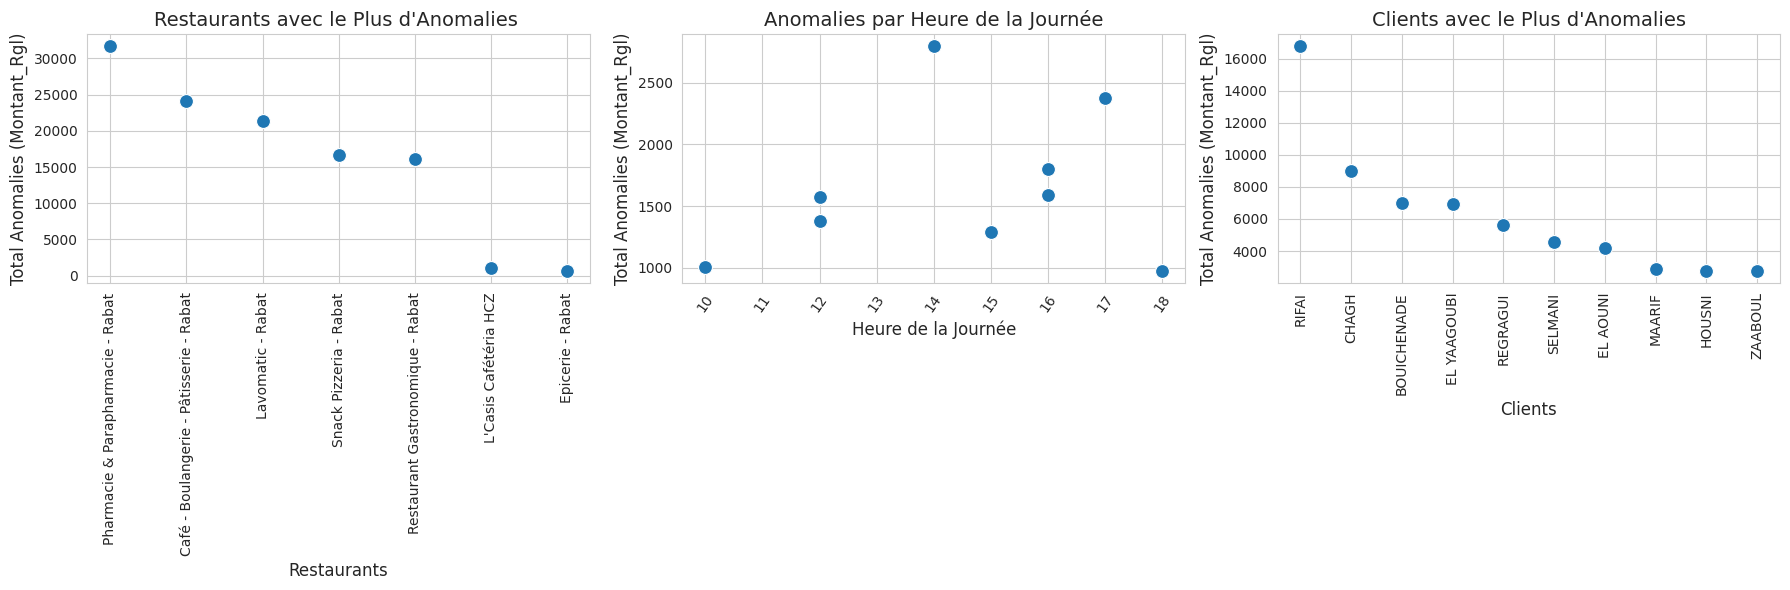

In [121]:
# Appliquer un style moderne avec des grilles et des palettes de couleurs dégradées
sns.set_style("whitegrid")  # Fond épuré avec des lignes de grille pour plus de lisibilité

# Créer une grille avec 1 ligne et 3 colonnes pour afficher trois visualisations côte à côte
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Dimension du graphique : 18 (largeur) et 6 (hauteur)
outliers_ParHeure['Heure_Règlement'] = pd.to_datetime(outliers_ParHeure['Heure_Règlement'], format='%H:%M:%S').dt.hour
# Visualisation 1 : Scatter plot pour les restaurants
# On affiche les 10 restaurants avec les montants d'anomalies les plus élevés
sns.scatterplot(x='Restaurants', y='Montant_Rgl', data=outliers_ParRestaurant.head(10), ax=axes[0], palette='Reds_d', s=100)
axes[0].set_title("Restaurants avec le Plus d'Anomalies ", fontsize=14)  # Ajouter un titre significatif avec une taille de police de 14
axes[0].set_xlabel("Restaurants", fontsize=12)  # Ajouter un libellé pour l'axe des abscisses avec une taille de police de 12
axes[0].set_ylabel("Total Anomalies (Montant_Rgl)", fontsize=12)  # Libellé de l'axe des ordonnées
axes[0].tick_params(axis='x', rotation=90)  # Rotation des étiquettes de l'axe X à 90° pour améliorer la lisibilité

# Visualisation 2 : Scatter plot pour les heures de règlement
# On montre les 10 plages horaires où les anomalies de règlement sont les plus fréquentes
sns.scatterplot(x='Heure_Règlement', y='Montant_Rgl', data=outliers_ParHeure.head(10), ax=axes[1], palette='Greens_d', s=100)
axes[1].set_title("Anomalies par Heure de la Journée", fontsize=14)  # Titre avec taille de police de 14 pour souligner l'importance de l'heure
axes[1].set_xlabel("Heure de la Journée", fontsize=12)  # Libellé de l'axe X
axes[1].set_ylabel("Total Anomalies (Montant_Rgl)", fontsize=12)  # Libellé de l'axe Y
axes[1].tick_params(axis='x', rotation=55)  # Rotation des étiquettes à 55° pour un meilleur affichage des heures

# Visualisation 3 : Scatter plot pour les clients
# Cette visualisation met en avant les 10 clients avec les montants d'anomalies les plus élevés
sns.scatterplot(x='Bénéficiaires', y='Montant_Rgl', data=outliers_ParClient.head(10), ax=axes[2], palette='Blues_d', s=100)
axes[2].set_title("Clients avec le Plus d'Anomalies", fontsize=14)  # Titre pour identifier les clients principaux avec des anomalies
axes[2].set_xlabel("Clients", fontsize=12)  # Libellé de l'axe X pour les clients
axes[2].set_ylabel("Total Anomalies (Montant_Rgl)", fontsize=12)  # Libellé de l'axe Y
axes[2].tick_params(axis='x', rotation=90)  # Rotation à 90° pour les noms de clients souvent longs

# Ajuster la disposition des sous-graphiques pour éviter les chevauchements
plt.tight_layout()

# Afficher les graphiques
plt.show()


## 8. Analyse des performances des caissiers

- **But** : Évaluer l'efficacité des caissiers.
- **Détails** : Grouper les transactions par caissier (`Prenom User`) pour analyser le montant total traité et le nombre de transactions effectuées. Créer des graphiques en barres pour visualiser les performances des caissiers, ce qui permet d'identifier les employés les plus performants.


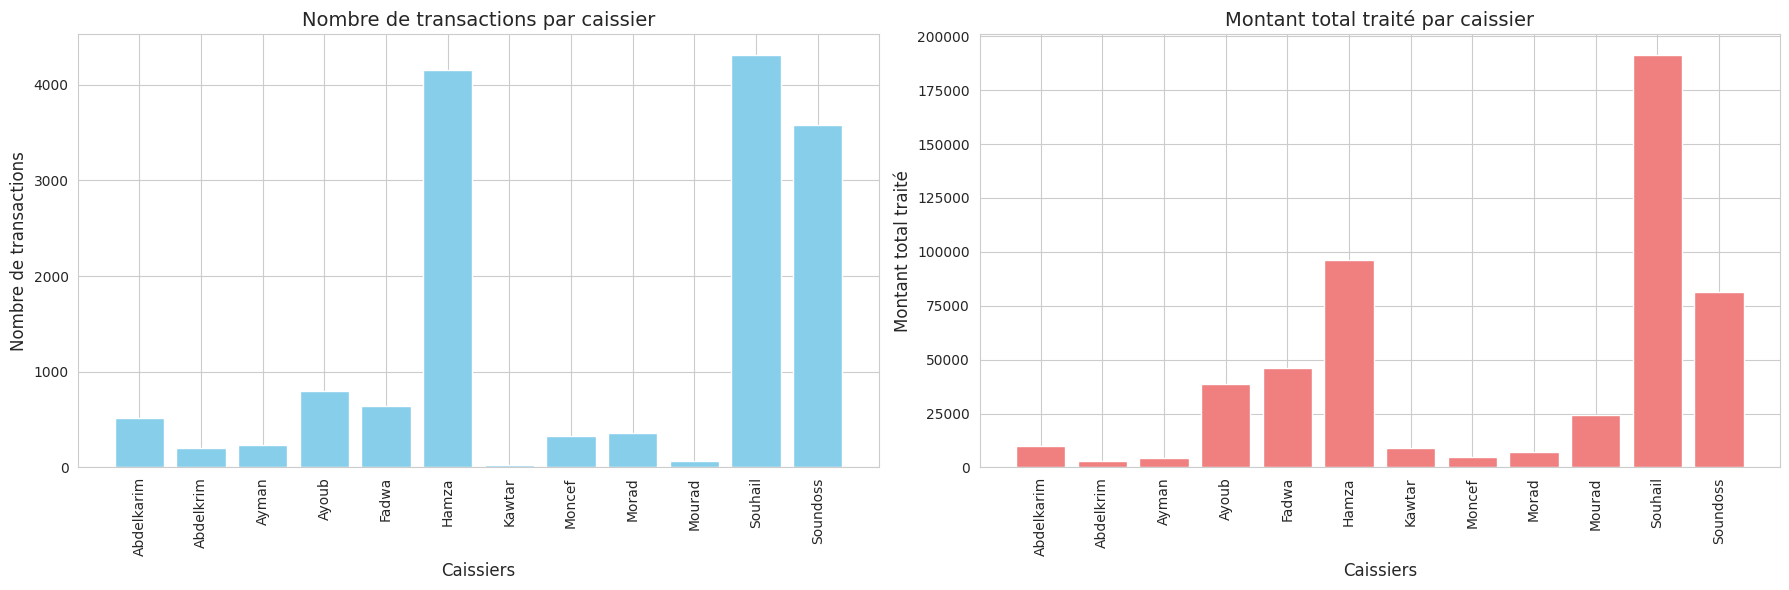

In [126]:
import matplotlib.pyplot as plt

# Grouper les données par caissier (Prenom User) pour analyser le montant total traité et le nombre de transactions effectuées
Group_Prenom = dt.groupby('Prenom User').agg(
    Montant_Total=('Montant_Rgl', 'sum'),   # Somme des montants réglés
    transactions_nomber=('Montant_Rgl', 'count')  # Nombre de transactions
).reset_index()

# Créer une figure avec 2 sous-graphes (1 ligne, 2 colonnes)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Premier graphique : Nombre de transactions par caissier
axes[0].bar(Group_Prenom['Prenom User'], Group_Prenom['transactions_nomber'], color='skyblue')
axes[0].set_xlabel("Caissiers", fontsize=12)  # Libellé de l'axe X
axes[0].set_ylabel("Nombre de transactions", fontsize=12)  # Libellé de l'axe Y
axes[0].set_title("Nombre de transactions par caissier", fontsize=14)  # Titre du graphique
axes[0].tick_params(axis='x', rotation=90)  # Rotation des étiquettes pour une meilleure lisibilité
axes[0].grid(True)  # Ajouter une grille pour améliorer la lisibilité

# Deuxième graphique : Montant total traité par caissier
axes[1].bar(Group_Prenom['Prenom User'], Group_Prenom['Montant_Total'], color='lightcoral')
axes[1].set_xlabel("Caissiers", fontsize=12)  # Libellé de l'axe X
axes[1].set_ylabel("Montant total traité", fontsize=12)  # Libellé de l'axe Y
axes[1].set_title("Montant total traité par caissier", fontsize=14)  # Titre du graphique
axes[1].tick_params(axis='x', rotation=90)  # Rotation des étiquettes pour une meilleure lisibilité
axes[1].grid(True)  # Ajouter une grille pour améliorer la lisibilité

# Ajuster la disposition des sous-graphiques pour éviter les chevauchements
plt.tight_layout()

# Afficher les graphiques
plt.show()



## 9. Analyse de la corrélation

- **But** : Étudier la relation entre le solde des cartes prépayées et les dépenses des clients.
- **Détails** : Utiliser des scatter plots pour explorer la relation entre le solde des cartes prépayées (`Solde_CPP`) et les montants dépensés (`Montant_Rgl`). Calculer la corrélation entre ces deux variables pour chaque client afin de mieux comprendre comment le solde des cartes influence les dépenses.

Corrélation entre le solde des cartes prépayées et les dépenses : 0.8991126538883902


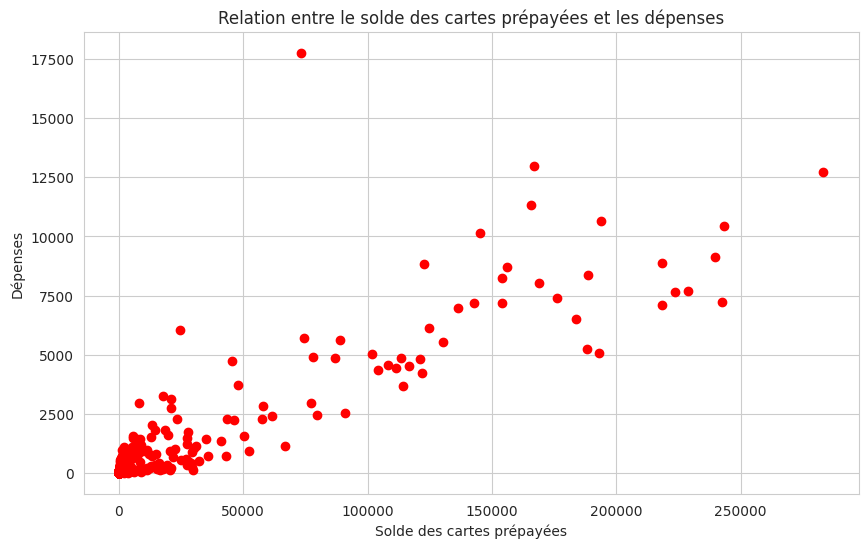

In [154]:
# Analyser la relation entre le solde des cartes prépayées et les dépenses des clients
#  en utilisant des corrélations et des scatter plots.
# utliser clients comme cle étranger pour decouvrir relation entre  le solde des cartes prépayées et les dépenses des clients
group_by_montant = dt.groupby('Bénéficiaire_CPP')['Montant_Rgl'].sum().reset_index()
group_by_solde = dt.groupby('Bénéficiaire_CPP')['Solde_CPP'].sum().reset_index()
# Display the merged DataFrame
liee_tables = pd.merge(group_by_montant, group_by_solde, on='Bénéficiaire_CPP', how='inner')
liee_tables.sort_values(by='Montant_Rgl', ascending=False)


correlation = liee_tables['Solde_CPP'].corr(liee_tables['Montant_Rgl'])
print(f"Corrélation entre le solde des cartes prépayées et les dépenses : {correlation}")
# Créer un scatter plot pour visualiser la relation
plt.figure(figsize=(10, 6))
plt.scatter(liee_tables['Solde_CPP'], liee_tables['Montant_Rgl'], color='red')
plt.title("Relation entre le solde des cartes prépayées et les dépenses")
plt.xlabel("Solde des cartes prépayées")
plt.ylabel("Dépenses")
plt.show()
